# Steps for PCA Analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

In [4]:
#reading data

df= pd.read_excel('PCA India Data_Census.xlsx')

### Box Plot before Scaling the data 




In [5]:
## Splitting numerical and categorical columns.
num = []
cat = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)

In [6]:
cat

['State', 'Area Name']

In [7]:
## Splitting numerical and categorical columns.
df_num = df.drop(['State', 'Area Name'], axis=1)

df_cat = df[['State', 'Area Name']]

In [8]:
df_num.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478


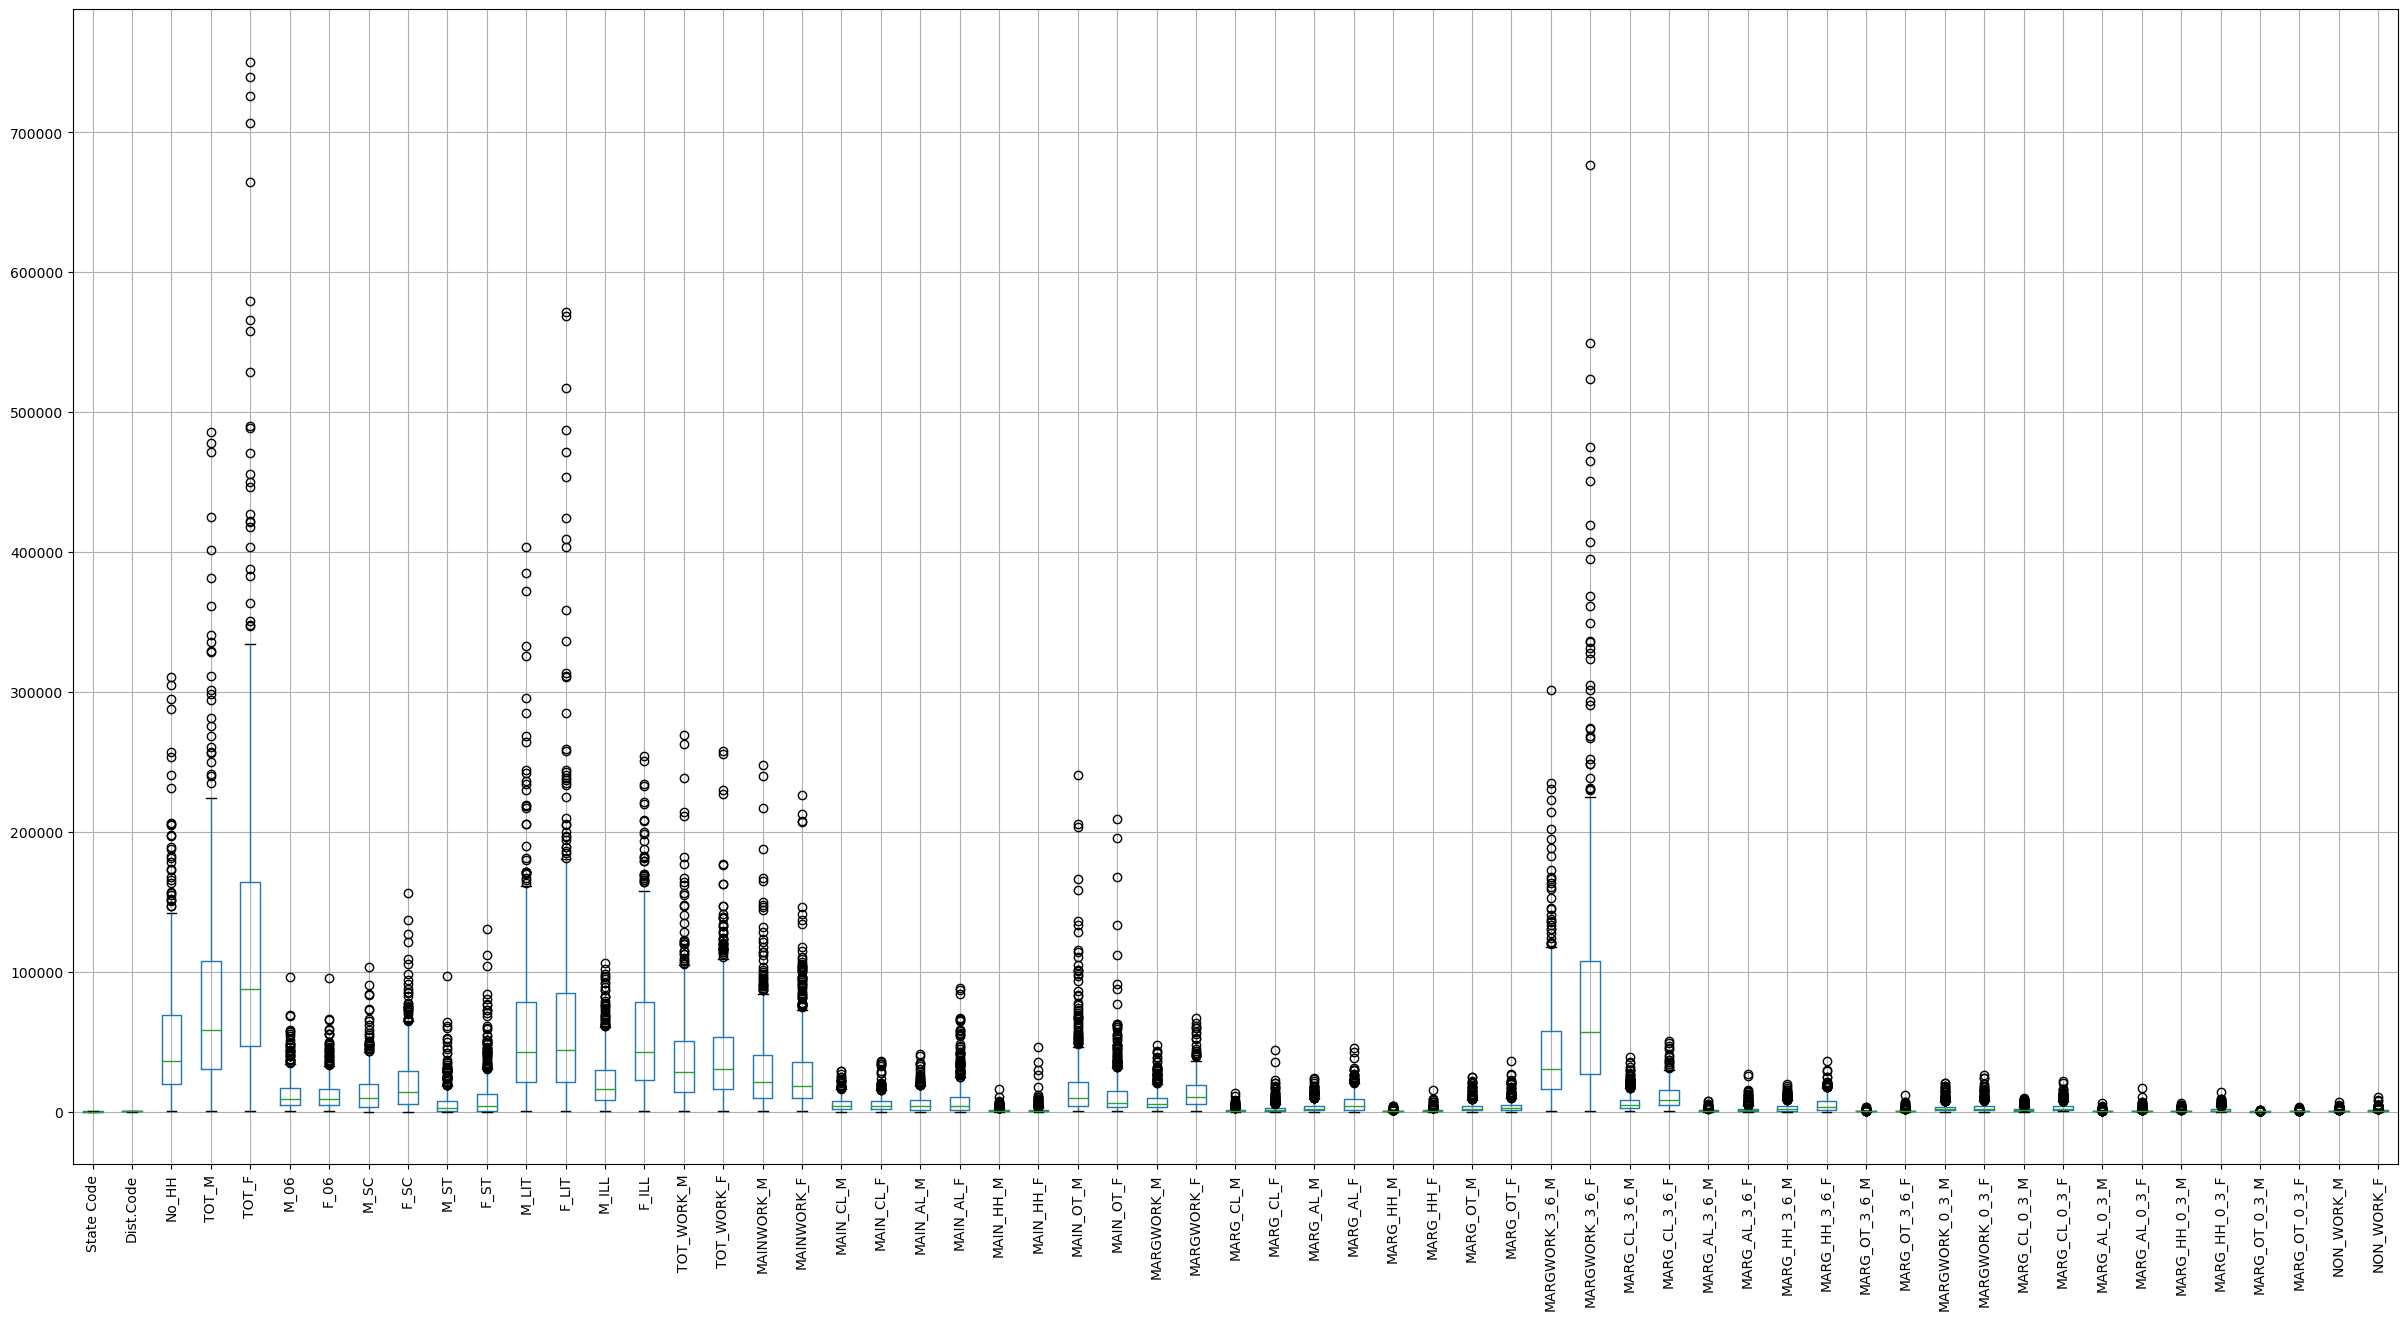

In [9]:
df_num.boxplot(figsize = (30,15))
plt.xticks(rotation=90)
plt.show()

In [10]:
## Standardizing numerical columns.
from scipy.stats import zscore
df_num_scaled = df_num.apply(zscore)
df_num_scaled.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


### Box Plot after scaling the data

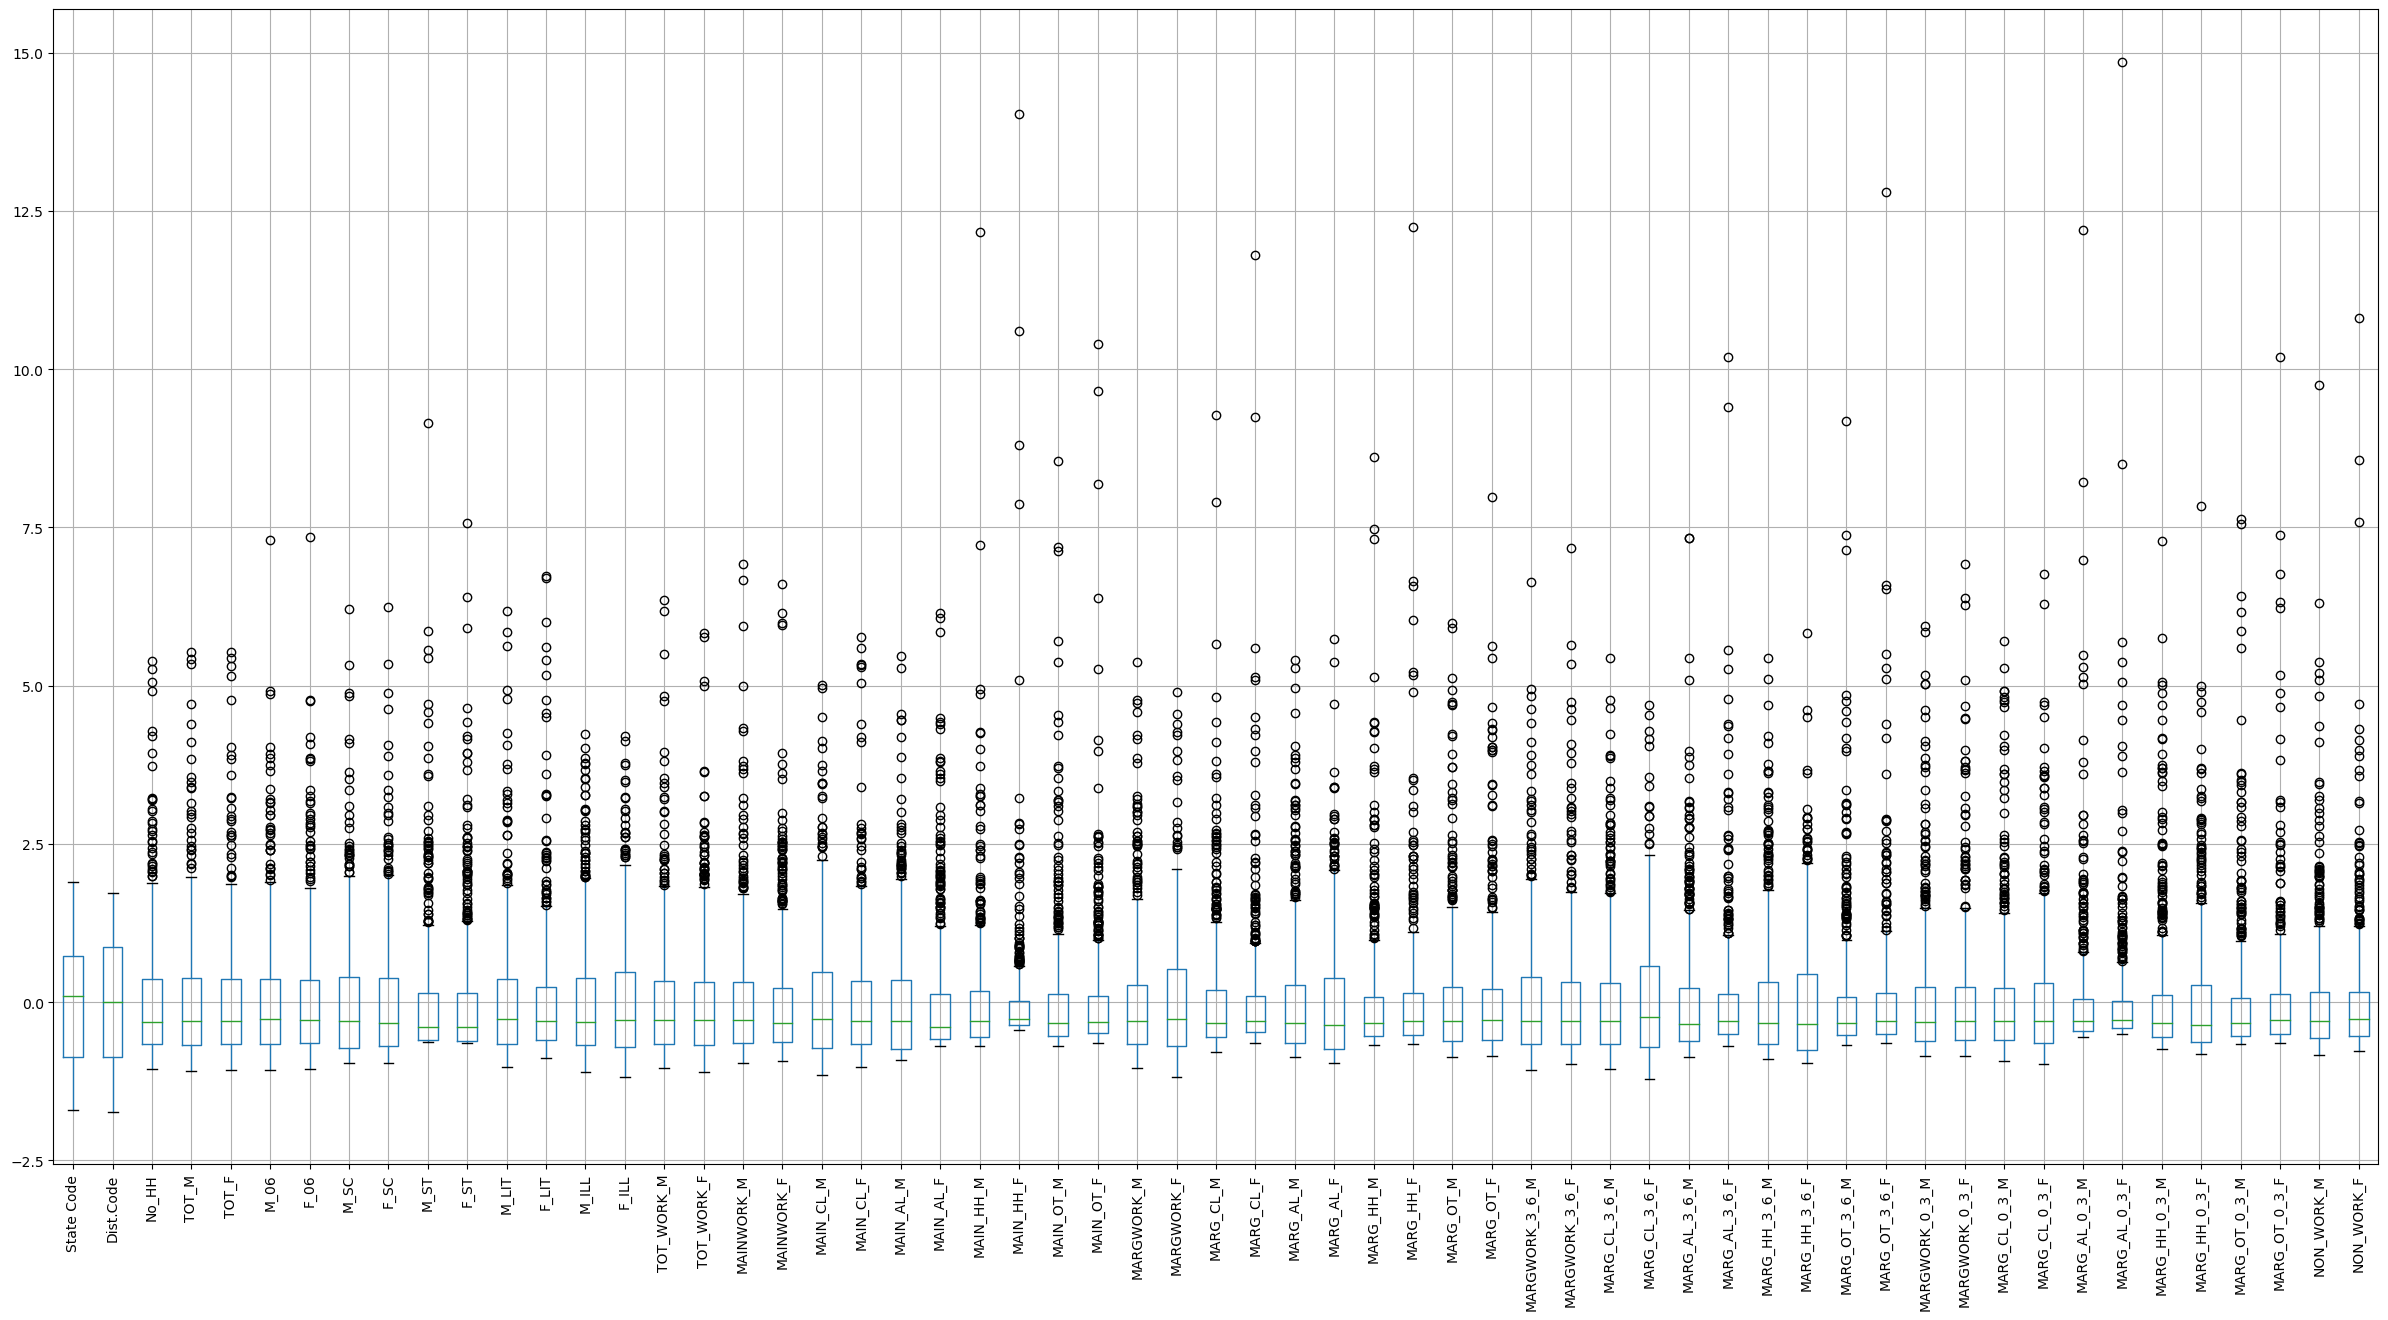

In [11]:
df_num_scaled.boxplot(figsize = (30,15))
plt.xticks(rotation=90)
plt.show()

We didn't treat outliers, thus we have values more than +3 and -3. As these are populations of particular state and districts so treating outliers doesn't make sence here.

# Statistical Tests before PCA 

## Bartletts test of sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population. 

* H0: All variables in the data are uncorrelated.
* Ha: At least one pair of variables in the data are correlated.

If the null hypothesis cannot be rejected, then PCA is not advisable.

if the P-value is small,then we can reject the null hypothesis and agree that there is atleast one pair pf variables which are correlated, hence PCA is recomended.

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df_num_scaled)
p_value

C:\Users\Asus\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

As the p_value is 0, which is less than 0.05, PCA is recomended here.

## KMO Test

The Kaiser-Meyer-Olkin (KMO) Measure of Sampling Adequacy(MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than0.5,PCA is not recomended, since no reduction is expected. On the other hand, MSA>0.7 is expexted to provide a considerable reduction is the dimension and extraction of meaningful components.


In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(df_num_scaled)
kmo_model

C:\Users\Asus\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8053442139018983

MSA = 0.80349
Considerable reduction in data dimension is expected 

### Step 1- Create the covariance Matrix

In [14]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

pd.set_option('display.expand_frame_repr', True)
pd.get_option('display.max_rows')
np.set_printoptions(threshold=np.inf)

In [15]:
from sklearn.decomposition import PCA
pca= PCA(random_state=123)
df_pca = pca.fit_transform(df_num_scaled)

In [16]:
pd.DataFrame(np.round(pca.get_covariance(),2),columns=df_num_scaled.columns, index=df_num_scaled.columns) #cov matrix

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
State Code,1.00,0.99,0.39,0.17,0.27,0.05,0.06,0.05,0.15,0.24,0.26,0.21,0.29,0.01,0.19,0.25,0.44,0.28,0.48,0.00,0.16,0.32,0.51,0.02,0.20,0.26,0.34,0.01,0.16,-0.27,-0.25,-0.02,0.24,-0.08,0.06,0.15,0.25,0.08,0.18,0.04,0.21,-0.24,-0.24,-0.00,0.28,-0.07,0.07,0.15,0.24,-0.10,0.01,-0.30,-0.28,-0.09,0.07,-0.09,0.03,0.13,0.23
Dist.Code,0.99,1.00,0.38,0.16,0.27,0.06,0.07,0.04,0.14,0.23,0.26,0.21,0.28,0.02,0.20,0.24,0.44,0.27,0.48,0.00,0.16,0.34,0.52,0.02,0.20,0.24,0.33,0.02,0.17,-0.27,-0.26,0.00,0.26,-0.07,0.06,0.14,0.23,0.09,0.17,0.04,0.21,-0.24,-0.25,0.02,0.30,-0.06,0.07,0.14,0.23,-0.09,0.01,-0.31,-0.29,-0.08,0.09,-0.08,0.03,0.11,0.21
No_HH,0.39,0.38,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,0.93,0.76,0.86,0.94,0.93,0.93,0.89,0.43,0.38,0.67,0.59,0.64,0.49,0.85,0.82,0.68,0.70,0.17,0.08,0.44,0.49,0.50,0.54,0.80,0.83,0.85,0.92,0.69,0.72,0.21,0.09,0.45,0.50,0.50,0.53,0.80,0.83,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.17,0.16,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,0.91,0.89,0.97,0.81,0.93,0.75,0.53,0.36,0.59,0.38,0.74,0.44,0.85,0.75,0.81,0.70,0.30,0.15,0.54,0.45,0.67,0.58,0.89,0.84,0.98,0.98,0.82,0.72,0.35,0.17,0.55,0.44,0.67,0.57,0.89,0.84,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.27,0.27,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,0.86,0.89,0.97,0.88,0.94,0.82,0.49,0.39,0.62,0.47,0.70,0.47,0.86,0.80,0.77,0.72,0.26,0.14,0.50,0.48,0.61,0.57,0.87,0.86,0.94,0.98,0.78,0.74,0.31,0.15,0.51,0.47,0.60,0.56,0.87,0.86,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.05,0.06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,0.95,0.86,0.86,0.68,0.79,0.59,0.56,0.38,0.55,0.30,0.66,0.36,0.69,0.56,0.85,0.72,0.42,0.24,0.64,0.49,0.70,0.54,0.84,0.75,0.99,0.94,0.86,0.72,0.47,0.25,0.64,0.47,0.69,0.53,0.84,0.74,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.06,0.07,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,0.95,0.87,0.85,0.69,0.79,0.59,0.56,0.38,0.56,0.30,0.66,0.36,0.68,0.56,0.86,0.72,0.42,0.23,0.65,0.50,0.70,0.55,0.84,0.75,0.99,0.94,0.87,0.72,0.48,0.25,0.65,0.48,0.70,0.54,0.84,0.74,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.05,0.04,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,0.80,0.83,0.83,0.71,0.78,0.65,0.61,0.36,0.63,0.41,0.71,0.39,0.64,0.58,0.75,0.66,0.30,0.15,0.56,0.46,0.67,0.57,0.75,0.69,0.81,0.80,0.75,0.66,0.34,0.16,0.57,0.45,0.66,0.56,0.74,0.69,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.15,0.14,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,0.76,0.85,0.82,0.78,0.78,0.71,0.58,0.39,0.67,0.51,0.68,0.42,0.64,0.60,0.73,0.68,0.28,0.14,0.55,0.51,0.63,0.57,0.73,0.70,0.79,0.79,0.73,0.70,0.32,0.15,0.56,0.51,0.63,0.55,0.72,0.70,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.24,0.23,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,0.08,0.14,0.12,0.27,0.11,0.23,0.10,0.19,0.14,0.20,-0.03,0.03,0.09,0.17,0.12,0.27,0.09,0.06,0.14,0.31,-0.01,0.09,0.07,0.12,0.06,0.05,0.12,0.28,0.12,0.08,0.14,0.32,-0.02,0.09,0.06,0.11,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15


### Step 2- Get eigen values and eigen vector 

In [17]:
eigenvec=pca.components_
print('Eigenvectors:', np.round(eigenvec,2))

Eigenvectors: [[ 0.03  0.03  0.16  0.17  0.17  0.16  0.16  0.15  0.15  0.03  0.03  0.16
   0.15  0.16  0.17  0.16  0.15  0.15  0.12  0.1   0.07  0.11  0.07  0.13
   0.08  0.12  0.11  0.16  0.16  0.08  0.05  0.13  0.11  0.14  0.13  0.16
   0.15  0.16  0.16  0.17  0.16  0.09  0.05  0.13  0.11  0.14  0.12  0.15
   0.15  0.15  0.14  0.05  0.04  0.12  0.12  0.14  0.13  0.15  0.13]
 [-0.16 -0.16 -0.13 -0.08 -0.1  -0.01 -0.01 -0.04 -0.05  0.01  0.01 -0.11
  -0.15  0.   -0.01 -0.13 -0.1  -0.17 -0.16  0.06  0.07 -0.05 -0.08 -0.06
  -0.08 -0.2  -0.2   0.1   0.11  0.27  0.25  0.16  0.12  0.08  0.03 -0.08
  -0.11 -0.03 -0.1   0.08  0.09  0.26  0.24  0.15  0.1   0.07  0.02 -0.08
  -0.12  0.15  0.17  0.25  0.24  0.18  0.17  0.09  0.05 -0.05 -0.07]
 [-0.25 -0.26 -0.03  0.06  0.02  0.07  0.06  0.04 -0.01 -0.2  -0.22  0.08
   0.09  0.02 -0.09  0.05 -0.13  0.05 -0.12 -0.07 -0.12 -0.24 -0.31  0.1
  -0.02  0.13  0.06  0.02 -0.1   0.1   0.13 -0.14 -0.29  0.06 -0.    0.13
   0.1   0.07  0.09  0.01 -0.12  0.

In [18]:
eigenvalues=pca.explained_variance_
print('Eigenvalues:', np.round(eigenvalues, 2))

Eigenvalues: [3.187e+01 8.190e+00 4.540e+00 3.840e+00 2.270e+00 1.960e+00 1.380e+00
 8.900e-01 7.200e-01 6.100e-01 4.900e-01 4.200e-01 3.400e-01 3.000e-01
 2.800e-01 1.800e-01 1.300e-01 1.100e-01 1.000e-01 1.000e-01 8.000e-02
 6.000e-02 4.000e-02 4.000e-02 3.000e-02 3.000e-02 2.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]


In [19]:
var_exp=np.round(pca.explained_variance_ratio_, 2)*100

In [20]:
var_exp

array([54., 14.,  8.,  7.,  4.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

### Step 3- View Screen Plot to identify the number of components to be built

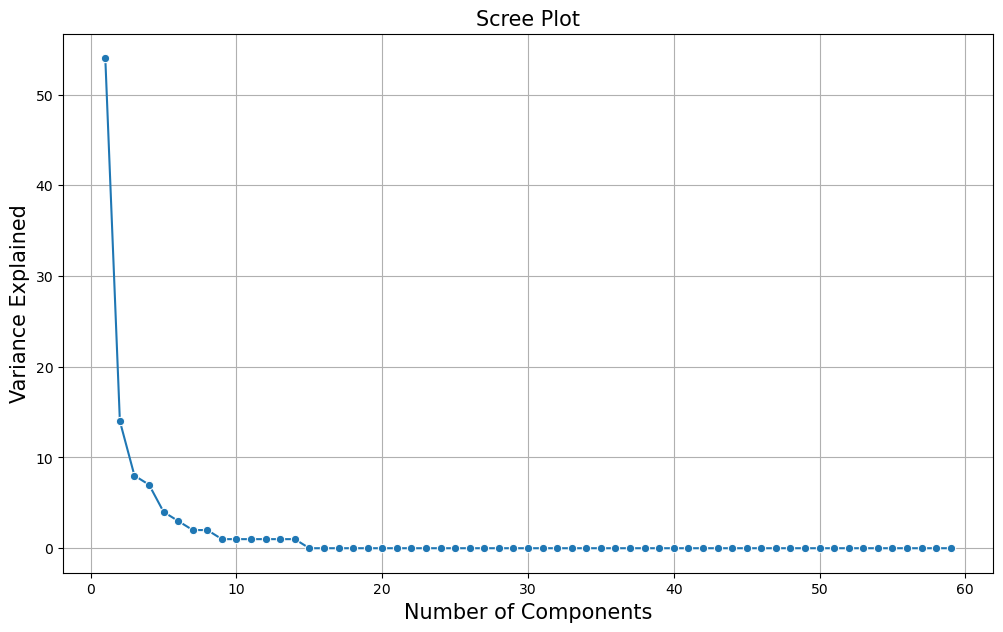

In [21]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp, x=range(1,len(var_exp)+1), marker='o')
plt.xlabel('Number of Components', fontsize=15)
plt.ylabel('Variance Explained', fontsize=15)
plt.title('Scree Plot', fontsize=15)
plt.grid()
plt.show()

From Above plot and cumulative explained variance, 6 PCs are chosen

### Step 4- Apply PCA for the number of decided components ot get the Loadings and compenet output



In [22]:
from sklearn.decomposition import PCA
pca= PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose()  #component output

array([[-4.71938093e+00, -4.87329665e+00, -6.06294775e+00,
        -6.37838738e+00, -4.58125854e+00, -3.42945128e+00,
        -5.12080382e+00, -4.70947915e+00, -5.28629689e+00,
        -4.32384950e+00, -5.87752370e+00, -5.45844694e+00,
        -6.21634762e+00, -4.01645413e+00, -5.86620671e+00,
        -5.44565735e+00, -6.12803429e+00, -6.06638256e+00,
        -4.56295084e+00, -5.74834755e+00, -1.15264040e+00,
        -5.68529278e+00, -1.39597481e+00,  1.01796312e+01,
        -6.54400298e+00, -4.08491974e+00,  3.55536230e+00,
        -6.11626743e-01, -2.91257499e+00, -2.83473821e+00,
        -3.43054377e+00, -3.96146912e+00, -2.18810936e+00,
        -6.24829502e+00,  2.50045573e+00, -3.51598340e+00,
         2.25874481e+00,  9.34474288e-01, -3.80825067e+00,
        -5.06155982e+00,  4.44991848e+00, -3.17311369e+00,
        -1.71748054e-01, -3.74131698e+00, -4.83649285e+00,
        -2.36462409e+00, -3.84048863e+00, -1.05127567e+00,
         2.41099018e+00, -1.27612798e+00, -3.84073881e+0

In [23]:
df_pca_loading= pd.DataFrame(pca.components_, columns=list(df_num_scaled),index=['PC0','PC1','PC2','PC3','PC4','PC5'])
df_pca_loading.shape

(6, 59)

In [24]:
df_pca_loading = np.round(df_pca_loading, 2)

In [27]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis=0)

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC0,0.030000,0.030000,0.160000,0.170000,0.170000,0.160000,0.160000,0.150000,0.150000,0.030000,0.030000,0.160000,0.150000,0.160000,0.170000,0.160000,0.150000,0.150000,0.120000,0.100000,0.070000,0.110000,0.070000,0.130000,0.080000,0.120000,0.110000,0.160000,0.160000,0.080000,0.050000,0.130000,0.110000,0.140000,0.130000,0.160000,0.150000,0.160000,0.160000,0.170000,0.160000,0.090000,0.050000,0.130000,0.110000,0.140000,0.120000,0.150000,0.150000,0.150000,0.140000,0.050000,0.040000,0.120000,0.120000,0.140000,0.130000,0.150000,0.130000
PC1,-0.160000,-0.160000,-0.130000,-0.080000,-0.100000,-0.010000,-0.010000,-0.040000,-0.050000,0.010000,0.010000,-0.110000,-0.150000,0.000000,-0.010000,-0.130000,-0.100000,-0.170000,-0.160000,0.060000,0.070000,-0.050000,-0.080000,-0.060000,-0.080000,-0.200000,-0.200000,0.100000,0.110000,0.270000,0.250000,0.160000,0.120000,0.080000,0.030000,-0.080000,-0.110000,-0.030000,-0.100000,0.080000,0.090000,0.260000,0.240000,0.150000,0.100000,0.070000,0.020000,-0.080000,-0.120000,0.150000,0.170000,0.250000,0.240000,0.180000,0.170000,0.090000,0.050000,-0.050000,-0.070000
PC2,-0.250000,-0.260000,-0.030000,0.060000,0.020000,0.070000,0.060000,0.040000,-0.010000,-0.200000,-0.220000,0.080000,0.090000,0.020000,-0.090000,0.050000,-0.130000,0.050000,-0.120000,-0.070000,-0.120000,-0.240000,-0.310000,0.100000,-0.020000,0.130000,0.060000,0.020000,-0.100000,0.100000,0.130000,-0.140000,-0.290000,0.060000,-0.000000,0.130000,0.100000,0.070000,0.090000,0.010000,-0.120000,0.080000,0.110000,-0.150000,-0.310000,0.070000,-0.000000,0.130000,0.100000,0.060000,-0.020000,0.150000,0.150000,-0.090000,-0.200000,0.060000,-0.000000,0.130000,0.090000
PC3,0.120000,0.110000,0.100000,0.030000,0.070000,0.010000,0.000000,-0.020000,0.000000,0.140000,0.140000,0.060000,0.100000,-0.050000,0.010000,0.050000,0.160000,0.070000,0.180000,0.030000,0.240000,-0.010000,0.130000,-0.130000,-0.070000,0.090000,0.140000,-0.080000,0.070000,0.160000,0.290000,-0.160000,-0.020000,-0.210000,-0.200000,-0.020000,0.030000,0.020000,0.030000,-0.090000,0.070000,0.120000,0.290000,-0.160000,-0.010000,-0.210000,-0.200000,-0.020000,0.020000,-0.040000,0.050000,0.230000,0.270000,-0.170000,-0.090000,-0.210000,-0.210000,-0.020000,0.040000
PC4,0.150000,0.140000,-0.020000,-0.050000,-0.030000,-0.070000,-0.060000,-0.190000,-0.170000,0.370000,0.380000,-0.020000,0.050000,-0.120000,-0.140000,-0.030000,-0.060000,-0.050000,-0.110000,-0.310000,-0.260000,-0.240000,-0.220000,-0.100000,-0.090000,0.060000,0.070000,0.060000,0.090000,0.000000,-0.030000,0.000000,0.040000,-0.020000,0.030000,0.130000,0.180000,-0.060000,-0.010000,0.050000,0.060000,0.010000,-0.040000,-0.010000,0.020000,-0.020000,0.020000,0.120000,0.150000,0.090000,0.140000,-0.020000,-0.020000,0.060000,0.110000,0.000000,0.060000,0.170000,0.250000
PC5,0.090000,0.080000,-0.000000,-0.070000,-0.050000,-0.150000,-0.150000,-0.050000,-0.020000,0.110000,0.110000,-0.060000,-0.050000,-0.110000,-0.030000,-0.010000,0.100000,0.010000,0.120000,0.010000,0.120000,-0.020000,0.020000,0.190000,0.440000,0.010000,0.060000,-0.090000,0.010000,0.050000,0.110000,-0.140000,-0.100000,0.110000,0.370000,-0.070000,-0.010000,-0.130000,-0.110000,-0.100000,0.010000,0.020000,0.110000,-0.140000,-0.100000,0.120000,0.390000,-0.070000,-0.000000,-0.060000,-0.010000,0.080000,0.100000,-0.130000,-0.120000,0.080000,0.300000,-0.060000,-0.040000


#### Observations:

The first Principal component is positively correlated with Number of Household, Total Male & Female population, Literacy & Illiteracy Numbers among M & F, Number of SC in Males & Females, Working population, etc. These variables explain the most variance in the data i.e. 56%

The Second Principal component is correlated with Marginal Cultivator Male/Female population and Marginal Agriculture (Male & Female) population etc. The Second PC explains about 14% of variation in the data.

The Third Principal Component explains about 7% variation in the data. It positively correlates with Marginal Agriculture 0-3 Female, and 3-6 M&F Population.

The Fourth Principal Component correlated positively with Marginal Households Male, Marginal Other (0- 3,3-6) Workers Male population. It explains about 6% of variation in the data.

The Fifth Principal Component explains about 4% variation in data. It is positively correlated with Scheduled Tribes Population Male& Female, Non-working Male& Female population.

The Sixth Principal Component explains about 3% variation in data. It is positively correlated with Female Marginal Other workers (0-3,3-6), Main & Marginal Households Female population.

Overall the first 6 PCs explain 90% variation in the data. Each PCs correlates with a different set of variables explaining how different aspects of population contribute to the variation in data.


In [26]:
#Linear Equation of first PCA

for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")", '*', df_num_scaled.columns[i], end='+')

( 0.03 ) * State Code+( 0.03 ) * Dist.Code+( 0.16 ) * No_HH+( 0.17 ) * TOT_M+( 0.17 ) * TOT_F+( 0.16 ) * M_06+( 0.16 ) * F_06+( 0.15 ) * M_SC+( 0.15 ) * F_SC+( 0.03 ) * M_ST+( 0.03 ) * F_ST+( 0.16 ) * M_LIT+( 0.15 ) * F_LIT+( 0.16 ) * M_ILL+( 0.17 ) * F_ILL+( 0.16 ) * TOT_WORK_M+( 0.15 ) * TOT_WORK_F+( 0.15 ) * MAINWORK_M+( 0.12 ) * MAINWORK_F+( 0.1 ) * MAIN_CL_M+( 0.07 ) * MAIN_CL_F+( 0.11 ) * MAIN_AL_M+( 0.07 ) * MAIN_AL_F+( 0.13 ) * MAIN_HH_M+( 0.08 ) * MAIN_HH_F+( 0.12 ) * MAIN_OT_M+( 0.11 ) * MAIN_OT_F+( 0.16 ) * MARGWORK_M+( 0.16 ) * MARGWORK_F+( 0.08 ) * MARG_CL_M+( 0.05 ) * MARG_CL_F+( 0.13 ) * MARG_AL_M+( 0.11 ) * MARG_AL_F+( 0.14 ) * MARG_HH_M+( 0.13 ) * MARG_HH_F+( 0.16 ) * MARG_OT_M+( 0.15 ) * MARG_OT_F+( 0.16 ) * MARGWORK_3_6_M+( 0.16 ) * MARGWORK_3_6_F+( 0.17 ) * MARG_CL_3_6_M+( 0.16 ) * MARG_CL_3_6_F+( 0.09 ) * MARG_AL_3_6_M+( 0.05 ) * MARG_AL_3_6_F+( 0.13 ) * MARG_HH_3_6_M+( 0.11 ) * MARG_HH_3_6_F+( 0.14 ) * MARG_OT_3_6_M+( 0.12 ) * MARG_OT_3_6_F+( 0.15 ) * MARGWORK_0_3

The variable names are indicative of their scaled form.

#### Project by Shreya Gupta 

contact: shreyasachin200@gmail.com